<a href="https://colab.research.google.com/github/getmubarak/ML/blob/master/algorithms/keras/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 with Keras and CNN
Testing Keras' CNNs on CIFAR10 with a pretty typical layer disposition.

## Data Setup

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train, y_train_), (x_test, y_test_) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train_)
y_test = to_categorical(y_test_)

## Model Definition

In [0]:
from keras.models import Sequential
model = Sequential()

In [0]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [0]:
model.add(Conv2D(filters=32, 
                kernel_size=(3, 3),
                activation='relu',
                input_shape=(32, 32, 3)))

In [0]:
model.add(MaxPool2D())

In [0]:
model.add(Conv2D(filters=64,
                kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPool2D())

In [0]:
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                23050     
Total params: 42,442
Trainable params: 42,442
Non-trainable params: 0
_________________________________________________________________
None


## Fitting

In [0]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15, verbose=1, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 277us/step - loss: 1.5254 - acc: 0.4570 - val_loss: 1.2749 - val_acc: 0.5561
Epoch 2/15
50000/50000 [==============================] - 12s 245us/step - loss: 1.1743 - acc: 0.5912 - val_loss: 1.1162 - val_acc: 0.6120
Epoch 3/15
 6500/50000 [==>...........................] - ETA: 9s - loss: 1.0544 - acc: 0.6334

50000/50000 [==============================] - 12s 244us/step - loss: 1.0489 - acc: 0.6380 - val_loss: 1.0281 - val_acc: 0.6404
Epoch 4/15
50000/50000 [==============================] - 12s 245us/step - loss: 0.9765 - acc: 0.6647 - val_loss: 0.9727 - val_acc: 0.6694
Epoch 5/15
25550/50000 [==============>...............] - ETA: 5s - loss: 0.9281 - acc: 0.6757

50000/50000 [==============================] - 12s 247us/step - loss: 0.9184 - acc: 0.6821 - val_loss: 0.9511 - val_acc: 0.6754
Epoch 6/15
50000/50000 [==============================] - 12s 243us/step - loss: 0.8771 - acc: 0.6995 - val_loss: 0.9850 - val_acc: 0.6576
Epoch 7/15
30950/50000 [=================>............] - ETA: 4s - loss: 0.8351 - acc: 0.7155

50000/50000 [==============================] - 12s 246us/step - loss: 0.8389 - acc: 0.7138 - val_loss: 0.9164 - val_acc: 0.6873
Epoch 8/15
50000/50000 [==============================] - 12s 246us/step - loss: 0.8058 - acc: 0.7240 - val_loss: 0.9307 - val_acc: 0.6818
Epoch 9/15
31900/50000 [==================>...........] - ETA: 4s - loss: 0.7780 - acc: 0.7342

50000/50000 [==============================] - 12s 246us/step - loss: 0.7814 - acc: 0.7325 - val_loss: 0.8895 - val_acc: 0.6974
Epoch 10/15
50000/50000 [==============================] - 12s 245us/step - loss: 0.7521 - acc: 0.7443 - val_loss: 0.9377 - val_acc: 0.6855
Epoch 11/15
32150/50000 [==================>...........] - ETA: 4s - loss: 0.7288 - acc: 0.7520

50000/50000 [==============================] - 12s 244us/step - loss: 0.7331 - acc: 0.7490 - val_loss: 0.9031 - val_acc: 0.6970
Epoch 12/15
50000/50000 [==============================] - 12s 247us/step - loss: 0.7125 - acc: 0.7552 - val_loss: 0.8983 - val_acc: 0.6990
Epoch 13/15
31150/50000 [=================>............] - ETA: 4s - loss: 0.6809 - acc: 0.7668

50000/50000 [==============================] - 12s 247us/step - loss: 0.6893 - acc: 0.7634 - val_loss: 0.8853 - val_acc: 0.7054
Epoch 14/15
50000/50000 [==============================] - 12s 246us/step - loss: 0.6720 - acc: 0.7705 - val_loss: 0.9015 - val_acc: 0.7005
Epoch 15/15
31400/50000 [=================>............] - ETA: 4s - loss: 0.6483 - acc: 0.7787

50000/50000 [==============================] - 12s 246us/step - loss: 0.6569 - acc: 0.7750 - val_loss: 0.9066 - val_acc: 0.6990


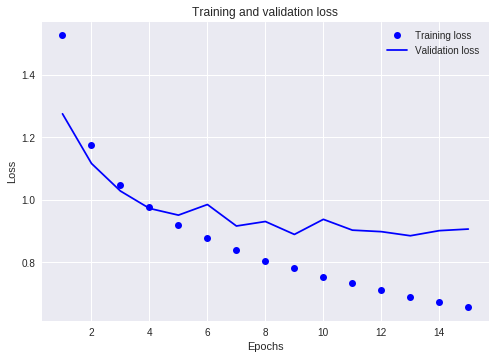

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()